# DEC Mini Project
# Topic: Predicting Crystal Structures from Material Data (Minerals Dataset)
# Group Members: Ameya Khire(PB 5), Sahil Ranawade(PB 16), Deven Chhajed(PB 32)
# Panel: B

# Importing the necessary libraries

In [1]:
# Data manipulation and analysis
import pandas as pd

# Plotting library for visualizations
import matplotlib.pyplot as plt

# Statistical data visualization built on Matplotlib
import seaborn as sns

# Dimensionality reduction technique
from sklearn.decomposition import PCA

# Preprocessing tools for standardization
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data splitting for model evaluation
from sklearn.model_selection import train_test_split

# K-Nearest Neighbors classifier for classification tasks
from sklearn.neighbors import KNeighborsClassifier

# Metrics for model evaluation (accuracy, classification report, confusion matrix)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Data Set

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Minerals_Database.csv to Minerals_Database.csv


# Reading the Data Set

In [3]:
data = pd.read_csv('Minerals_Database.csv')
data

Unnamed: 0               Name  Crystal Structure  Mohs Hardness  \
0              0    Abenakiite-(Ce)                5.0           4.50   
1              1       Abernathyite                4.0           2.75   
2              2           Abhurite                5.0           2.00   
3              3     Abswurmbachite                0.0           0.00   
4              4         Actinolite                2.0           5.50   
...          ...                ...                ...            ...   
3107        3107          Zoltaiite                0.0           0.00   
3108        3108  Zugshunstite-(Ce)                0.0           0.00   
3109        3109         Zvyaginite                0.0           0.00   
3110        3110         Zwieselite                0.0           0.00   
3111        3111        h-Magnetite                0.0           0.00   

      Diaphaneity  Specific Gravity  Optical  Refractive Index  Dispersion  \
0             0.0             3.240      3.0             1.580         0.0   
1             3.0             3.446      3.0             1.592         0.0   
2             3.0             4.420      3.0             2.085         0.0   
3             0.0             0.000      0.0             0.000         0.0   
4             2.0             1.050      4.0             1.634         0.0   
...           ...               ...      ...               ...         ...   
3107          0.0             0.000      0.0             0.000         0.0   
3108          0.0             0.000      0.0             0.000         0.0   
3109          0.0             0.000      0.0             0.000         0.0   
3110          0.0             0.000      0.0             0.000         0.0   
3111          0.0             0.000      0.0             0.000         0.0   

      Hydrogen  ...  Acetate  Phosphate  Sulphate  Carbonate  Ammonium  \
0          0.0  ...      0.0        0.0       0.0        0.0       0.0   
1          1.0  ...      0.0        0.0       0.0        0.0       0.0   
2          3.0  ...      0.0        0.0       0.0        0.0       0.0   
3          0.0  ...      0.0        0.0       0.0        0.0       0.0   
4          1.0  ...      0.0        0.0       0.0        0.0       0.0   
...        ...  ...      ...        ...       ...        ...       ...   
3107       0.0  ...      0.0        0.0       0.0        0.0       0.0   
3108      12.0  ...      0.0        0.0       0.0        0.0       0.0   
3109       0.0  ...      0.0        0.0       0.0        0.0       0.0   
3110       0.0  ...      0.0        0.0       0.0        0.0       0.0   
3111       0.0  ...      0.0        0.0       0.0        0.0       0.0   

      Hydrated Water  count   Molar Mass  Molar Volume  Calculated Density  
0                0.0   23.0   817.339002      0.123390               5.498  
1                1.0    9.0   435.069330      0.056083               6.439  
2                0.0   17.0   921.092220      0.122631               6.234  
3                0.0   12.0   550.019900      0.033658              13.563  
4                0.0   28.0   861.185368      0.112074               6.378  
...              ...    ...          ...           ...                 ...  
3107             0.0   17.0   677.090039      0.067308               8.349  
3108             0.0   33.0  1005.674169      0.280205               2.979  
3109             4.0   38.0  1037.626464      0.179472               4.799  
3110             0.0    8.0   225.663765      0.056017               3.344  
3111             0.0    9.0   291.060339      0.033646               7.180  

[3112 rows x 140 columns]

In [4]:
data.columns # Retrieve column labels from a DataFrame

Index(['Unnamed: 0', 'Name', 'Crystal Structure', 'Mohs Hardness',
       'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index',
       'Dispersion', 'Hydrogen',
       ...
       'Acetate', 'Phosphate', 'Sulphate', 'Carbonate', 'Ammonium',
       'Hydrated Water', 'count', 'Molar Mass', 'Molar Volume',
       'Calculated Density'],
      dtype='object', length=140)

**df.drop(["Unnamed: 0"], axis=1):** Removes the column labeled "Unnamed: 0" from the DataFrame along the specified axis (axis=1 refers to columns).

**Use:** Eliminates the specified column from the DataFrame, allowing for data cleaning by removing redundant or unnecessary columns.

In [5]:
# Drop the column named "Unnamed: 0" from the DataFrame 'df'
data = data.drop(["Unnamed: 0"], axis=1)
data

Name  Crystal Structure  Mohs Hardness  Diaphaneity  \
0       Abenakiite-(Ce)                5.0           4.50          0.0   
1          Abernathyite                4.0           2.75          3.0   
2              Abhurite                5.0           2.00          3.0   
3        Abswurmbachite                0.0           0.00          0.0   
4            Actinolite                2.0           5.50          2.0   
...                 ...                ...            ...          ...   
3107          Zoltaiite                0.0           0.00          0.0   
3108  Zugshunstite-(Ce)                0.0           0.00          0.0   
3109         Zvyaginite                0.0           0.00          0.0   
3110         Zwieselite                0.0           0.00          0.0   
3111        h-Magnetite                0.0           0.00          0.0   

      Specific Gravity  Optical  Refractive Index  Dispersion  Hydrogen  \
0                3.240      3.0             1.580         0.0       0.0   
1                3.446      3.0             1.592         0.0       1.0   
2                4.420      3.0             2.085         0.0       3.0   
3                0.000      0.0             0.000         0.0       0.0   
4                1.050      4.0             1.634         0.0       1.0   
...                ...      ...               ...         ...       ...   
3107             0.000      0.0             0.000         0.0       0.0   
3108             0.000      0.0             0.000         0.0      12.0   
3109             0.000      0.0             0.000         0.0       0.0   
3110             0.000      0.0             0.000         0.0       0.0   
3111             0.000      0.0             0.000         0.0       0.0   

      Helium  ...  Acetate  Phosphate  Sulphate  Carbonate  Ammonium  \
0        0.0  ...      0.0        0.0       0.0        0.0       0.0   
1        0.0  ...      0.0        0.0       0.0        0.0       0.0   
2        0.0  ...      0.0        0.0       0.0        0.0       0.0   
3        0.0  ...      0.0        0.0       0.0        0.0       0.0   
4        0.0  ...      0.0        0.0       0.0        0.0       0.0   
...      ...  ...      ...        ...       ...        ...       ...   
3107     0.0  ...      0.0        0.0       0.0        0.0       0.0   
3108     0.0  ...      0.0        0.0       0.0        0.0       0.0   
3109     0.0  ...      0.0        0.0       0.0        0.0       0.0   
3110     0.0  ...      0.0        0.0       0.0        0.0       0.0   
3111     0.0  ...      0.0        0.0       0.0        0.0       0.0   

      Hydrated Water  count   Molar Mass  Molar Volume  Calculated Density  
0                0.0   23.0   817.339002      0.123390               5.498  
1                1.0    9.0   435.069330      0.056083               6.439  
2                0.0   17.0   921.092220      0.122631               6.234  
3                0.0   12.0   550.019900      0.033658              13.563  
4                0.0   28.0   861.185368      0.112074               6.378  
...              ...    ...          ...           ...                 ...  
3107             0.0   17.0   677.090039      0.067308               8.349  
3108             0.0   33.0  1005.674169      0.280205               2.979  
3109             4.0   38.0  1037.626464      0.179472               4.799  
3110             0.0    8.0   225.663765      0.056017               3.344  
3111             0.0    9.0   291.060339      0.033646               7.180  

[3112 rows x 139 columns]

# Checking for the Null Values

In [6]:
data.isnull().sum()

Name                  0
Crystal Structure     0
Mohs Hardness         0
Diaphaneity           0
Specific Gravity      0
                     ..
Hydrated Water        0
count                 0
Molar Mass            0
Molar Volume          0
Calculated Density    0
Length: 139, dtype: int64

# Applying KNN Model with the Target as Crystal Structure

In [7]:
# Separate features (X) and target (y)
X = data.drop('Crystal Structure', axis=1)  # Features
y = data['Crystal Structure']  # Target

# Perform Label Encoding on the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert categorical to numerical labels

# Drop non-numeric columns from features
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Consider adjusting numeric data types if needed

# Data Preprocessing: Scale/Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Instantiate KNN classifier (you can adjust n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Decode numerical labels back to original categories
predicted_labels = label_encoder.inverse_transform(predictions)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Additional evaluation metrics can be used as needed
print(classification_report(y_test, predictions))

Accuracy: 0.7993579454253612
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       458
           1       0.10      0.05      0.06        22
           2       0.47      0.45      0.46        73
           3       0.22      0.15      0.18        34
           4       0.00      0.00      0.00        12
           5       0.27      0.19      0.22        21
           6       0.00      0.00      0.00         3

    accuracy                           0.80       623
   macro avg       0.28      0.26      0.27       623
weighted avg       0.75      0.80      0.77       623



# Plotting a Confusion Matrix

In [8]:
y_pred = knn.predict(X_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)

In [10]:
cm

array([[455,   0,   1,   0,   1,   0,   1],
       [  7,   1,  10,   4,   0,   0,   0],
       [ 22,   6,  33,   7,   1,   4,   0],
       [  8,   2,  13,   5,   1,   5,   0],
       [  2,   1,   5,   3,   0,   1,   0],
       [  6,   0,   7,   3,   1,   4,   0],
       [  0,   0,   1,   1,   0,   1,   0]])

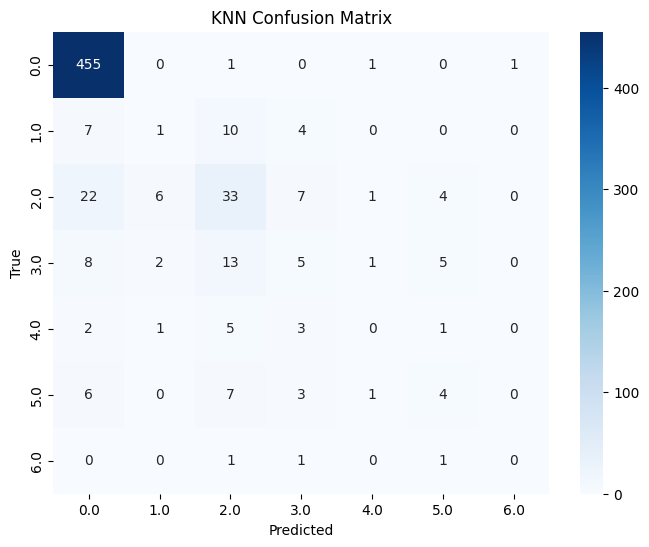

In [11]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

- The top-left element (455) represents the True Negatives (TN).
- The top-right element (1) represents the False Positives (FP).
- The bottom-left element (0) represents the False Negatives (FN).
- The bottom-right element (0) represents the True Positives (TP).

# K-Nearest Neighbors (KNN)

**Target:** Predicting 'Crystal Structure' based on mineral features.
Accuracy: Achieved an accuracy of around 80%.

**Inference:** KNN showed reasonable accuracy, but varied precision and recall across different classes. Some classes had high precision and recall, indicating good predictive performance, while others showed lower precision and recall, implying room for improvement.

# Importing the necessary Libraries

In [12]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split

# Metrics for evaluating model performance
from sklearn import metrics

# Decision Tree Classifier for classification tasks
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text

# Metric for accuracy evaluation
from sklearn.metrics import accuracy_score

# Visualization tool for decision trees
import graphviz

# Displaying images in IPython environment
from IPython.display import Image

# Plotting a Decision Tree

In [13]:
x = data[['Hydrogen',	'Helium',	'Lithium',	'Beryllium',	'Boron',	'Carbon',	'Nitrogen',	'Oxygen',	'Fluorine',	'Neon',	'Sodium',	'Magnesium',	'Aluminium',	'Silicon',	'Phosphorus',	'Sulfur',	'Chlorine',	'Argon',	'Potassium',	'Calcium',	'Scandium',	'Titanium',	'Vanadium',	'Chromium',	'Manganese',	'Iron',	'Cobalt',	'Nickel',	'Copper',	'Zinc',	'Gallium',	'Germanium',	'Arsenic',	'Selenium',	'Bromine',	'Krypton',	'Rubidium',	'Strontium',	'Yttrium',	'Zirconium',	'Niobium',	'Molybdenum',	'Technetium',	'Ruthenium',	'Rhodium',	'Palladium',	'Silver',	'Cadmium',	'Indium',	'Tin',	'Antimony',	'Tellurium',	'Iodine',	'Xenon',	'Cesium',	'Barium',	'Lanthanum',	'Cerium',	'Praseodymium',	'Neodymium',	'Promethium',	'Samarium',	'Europium',	'Gadolinium',	'Terbium',	'Dysprosium',	'Holmium', 'Erbium', 'Thulium', 'Ytterbium',	'Lutetium',	'Hafnium',	'Tantalum',	'Tungsten',	'Rhenium',	'Osmium',	'Iridium',	'Platinum',	'Gold',	'Mercury',	'Thallium',	'Lead',	'Bismuth',	'Polonium',	'Astatine',	'Radon',	'Francium',	'Radium',	'Actinium',	'Thorium',	'Protactinium',	'Uranium',	'Neptunium',	'Plutonium',	'Americium',	'Curium',	'Berkelium',	'Californium',	'Einsteinium',	'Fermium',	'Mendelevium',	'Nobelium',	'Lawrencium',	'Rutherfordium',	'Dubnium',	'Seaborgium',	'Bohrium',	'Hassium',	'Meitnerium',	'Darmstadtium',	'Roentgenium',	'Copernicium',	'Nihonium',	'Flerovium',	'Moscovium',	'Livermorium',	'Tennessine',	'Oganesson',	'Cyanide',	'Nitrate',	'Hydroxyl',	'Acetate',	'Phosphate',	'Sulphate',	'Carbonate',	'Ammonium',	'Hydrated Water']]
y = data['Crystal Structure'] # target

In [14]:
x = pd.get_dummies(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_features='log2')

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6092077087794433


In [16]:
plt.figure(figsize=(250, 250))
plot_tree(clf, feature_names=x.columns, max_depth=3, filled=True);

# Plotting Confusion Matrix

In [17]:
y_pred = clf.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[544,  21,  64,  36,   6,  26,   5],
       [ 22,   2,   3,   1,   0,   2,   0],
       [ 56,   4,   9,  13,   4,   3,   1],
       [ 38,   2,   5,   6,   1,   2,   0],
       [ 13,   0,   0,   1,   2,   1,   0],
       [ 27,   1,   0,   1,   0,   5,   0],
       [  4,   0,   0,   2,   0,   0,   1]])

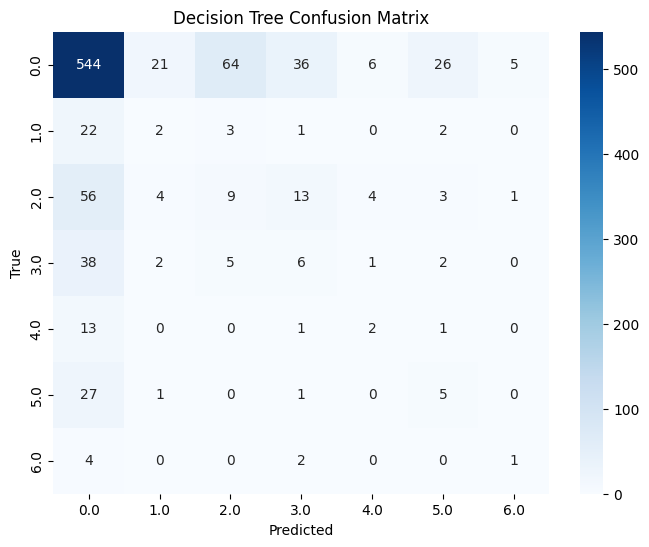

In [20]:
class_labels = label_encoder.classes_

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

- The top-left element (544) represents the True Negatives (TN).
- The top-right element (5) represents the False Positives (FP).
- The bottom-left element (4) represents the False Negatives (FN).
- The bottom-right element (1) represents the True Positives (TP).

# Decision Tree Classifier

**Target**: Similar to KNN, predicting 'Crystal Structure' based on features.
Accuracy: Achieved an accuracy of around 61%.

**Inference:** The Decision Tree model yielded lower accuracy compared to KNN. It struggled to perform well across multiple classes, showing imbalanced predictive capabilities for different 'Crystal Structure' types.

# Random Forest

In [21]:
# RandomForestClassifier from sklearn.ensemble used for ensemble-based classification with decision trees.
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target (y)
X = data.drop('Crystal Structure', axis=1)  # Features
y = data['Crystal Structure']  # Target

# Perform Label Encoding on the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert categorical to numerical labels

# Drop non-numeric columns from features
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Consider adjusting numeric data types if needed

# Data Preprocessing: Scale/Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Instantiate Random Forest classifier with 100 trees (you can adjust hyperparameters)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
predictions_rf = random_forest.predict(X_test)

# Decode numerical labels back to original categories
predicted_labels_rf = label_encoder.inverse_transform(predictions_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Additional evaluation metrics can be used as needed
print(classification_report(y_test, predictions_rf))

Random Forest Accuracy: 0.8683788121990369
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       458
           1       0.50      0.23      0.31        22
           2       0.60      0.71      0.65        73
           3       0.53      0.29      0.38        34
           4       0.67      0.17      0.27        12
           5       0.62      0.86      0.72        21
           6       0.00      0.00      0.00         3

    accuracy                           0.87       623
   macro avg       0.55      0.46      0.47       623
weighted avg       0.85      0.87      0.85       623



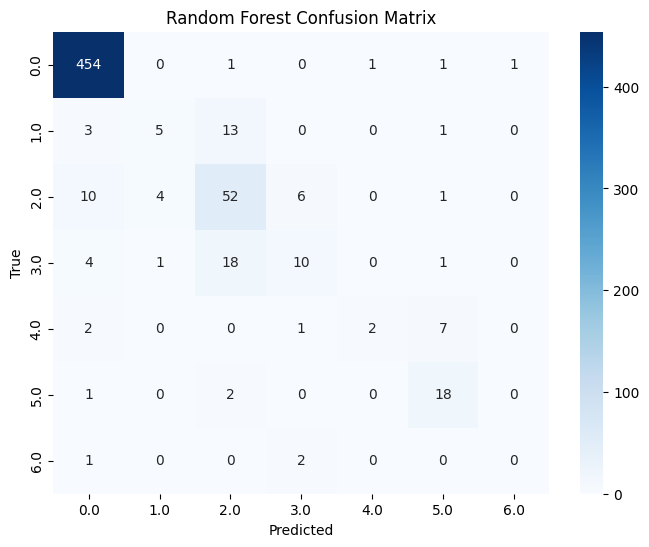

In [22]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

- The top-left element (454) represents the True Negatives (TN).
- The top-right element (1) represents the False Positives (FP).
- The bottom-left element (1) represents the False Negatives (FN).
- The bottom-right element (0) represents the True Positives (TP).

# Random Forest Classifier

**Target:** Same as the other models, predicting 'Crystal Structure' from mineral features.

**Accuracy:** Achieved an accuracy of around 87%.

**Inference:** Random Forest performed the best among the models, showing higher accuracy. It had better precision and recall across various classes compared to the other models, but some classes still exhibited lower precision and recall.

# Conclusion:

**Model Comparison:** Among the three models tested, the Random Forest Classifier performed the best, demonstrating the highest accuracy and better predictive capabilities across different 'Crystal Structure' categories.

**Areas for Improvement:** Despite the success of the Random Forest model, there's still room for improvement, especially in handling specific 'Crystal Structure' classes where precision and recall were relatively low across all models.

**Next Steps:** Further feature engineering, exploring different algorithms, or adjusting model hyperparameters could potentially enhance predictive performance, leading to more accurate classification of 'Crystal Structure' based on mineral characteristics.